In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Q1. Loading dataSet into pandas </h2>

In [2]:
# Reading the CSV file 'DataScienceSalary.csv' and storing it in a DataFrame named 'df'
df = pd.read_csv('DataScienceSalary.csv')

# Displaying the first few rows of the DataFrame 'df' to preview the dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Checking the shape of the DataFrame 'df'
df.shape

(3755, 11)

In [4]:
# Displaying the concise summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


<h2> Q2. Remove unnecessary columns i.e., salary and salary currency</h2>

In [5]:
# Creating a new DataFrame 'Filter' by dropping the columns 'salary' and 'salary_currency' from the original DataFrame 'df'
filtered_data = df.drop(['salary', 'salary_currency'], axis=1)

# Displaying the column names of the new DataFrame 'Filter'
filtered_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

<h2> Q3. Removing the NaN missing values from updated dataframe </h2> 

In [6]:
# Checking for missing values in each column of the DataFrame 'df'
filtered_data.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h2> Q4.Checking duplicates value in the dataframe </h2>

In [20]:
# Checking for duplicate rows in the DataFrame 'df'
duplicates = filtered_data.duplicated().sum()

# Displaying the number of duplicate rows found, if any
if duplicates > 0:
    print(f'{duplicates} duplicate rows found')
else:
    print('No duplicate rows found')

1171 duplicate rows found


<H2> Q5. Checking the unique values from all the columns in the dataframe.</H2>

In [8]:
# Counting the number of unique values in each column of the DataFrame 'df'
unique_counts =filtered_data.nunique()

# Displaying the number of unique values in each column
print(unique_counts)

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


<h2> Q6. Renaming the experience level columns </h2> <h4> <br>
SE – Senior Level/Expert <br>
MI – Medium Level/Intermediate <br>
EN – Entry Level <br>
EX – Executive Level <br>
</h4>

In [9]:
# Renaming the categories in the 'experience_level' column
filtered_data['experience_level'] = filtered_data['experience_level'].replace(['SE','MI','EN','EX'],
                                                        ['Senior Level/Expert',
                                                         'Medium Level/Intermediate',
                                                         'Entry Level',
                                                         'Executive Level'])

# Displaying the first few rows of the DataFrame after renaming the categories
filtered_data.head()
                                                                               
                                                                               

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,CA,100,CA,M


<h2> Q7. Showing summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable.</h2> 

In [10]:
# Calculating the sum of the salary
salary_sum = filtered_data['salary_in_usd'].sum()
print('Sum of the salary is', salary_sum)

# Calculating the mean of the salary
salary_mean = filtered_data['salary_in_usd'].mean()
print('Mean of the salary is', salary_mean)

# Calculating the standard deviation of the salary
salary_std = filtered_data['salary_in_usd'].std()
print('Standard deviation of salary is', salary_std)

# Calculating the skewness of the salary
salary_skewness = filtered_data['salary_in_usd'].skew()
print('Skewness of the salary is', salary_skewness)

# Calculating the kurtosis of the salary
salary_kurtosis = filtered_data['salary_in_usd'].kurtosis()
print('Kurtosis of the salary is', salary_kurtosis)


Sum of the salary is 516576814
Mean of the salary is 137570.38988015978
Standard deviation of salary is 63055.625278224084
Skewness of the salary is 0.5364011659712974
Kurtosis of the salary is 0.8340064594833612


<H2> Q8. Calculating and showing correlation of all variables.</H2> 

In [11]:
# Calculating correlation matrix for numerical columns
correlation = filtered_data.select_dtypes(include=['int64']).corr()
correlation

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


<h2> Q9.Finding out top 15 jobs. Make a line plot of sales as well. </h2>

In [12]:
# Finding the top 15 job titles
top_15_jobs = filtered_data['job_title'].value_counts().head(15)
top_15_jobs

job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: count, dtype: int64

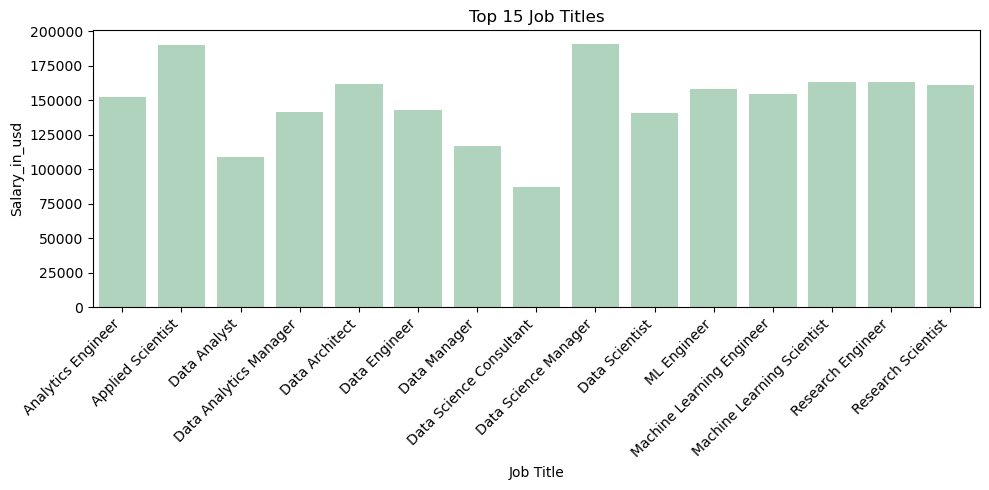

In [13]:
# Plotting the top 15 job titles
salary_top_15_jobs = filtered_data[filtered_data['job_title'].isin(top_15_jobs.index)].groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(10, 5))  # Setting the figure size
sns.barplot(x=salary_top_15_jobs.index, y=salary_top_15_jobs.values, color='#AAD9BB')  # Corrected syntax
plt.title('Top 15 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary_in_usd')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ensuring tight layout
plt.show()  # Displaying the plot



<h2> Q10.Finding out job with highest salaries. Illustrating it through bar Graph.</h2>

In [14]:
highest_salaries= filtered_data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
highest_salaries

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

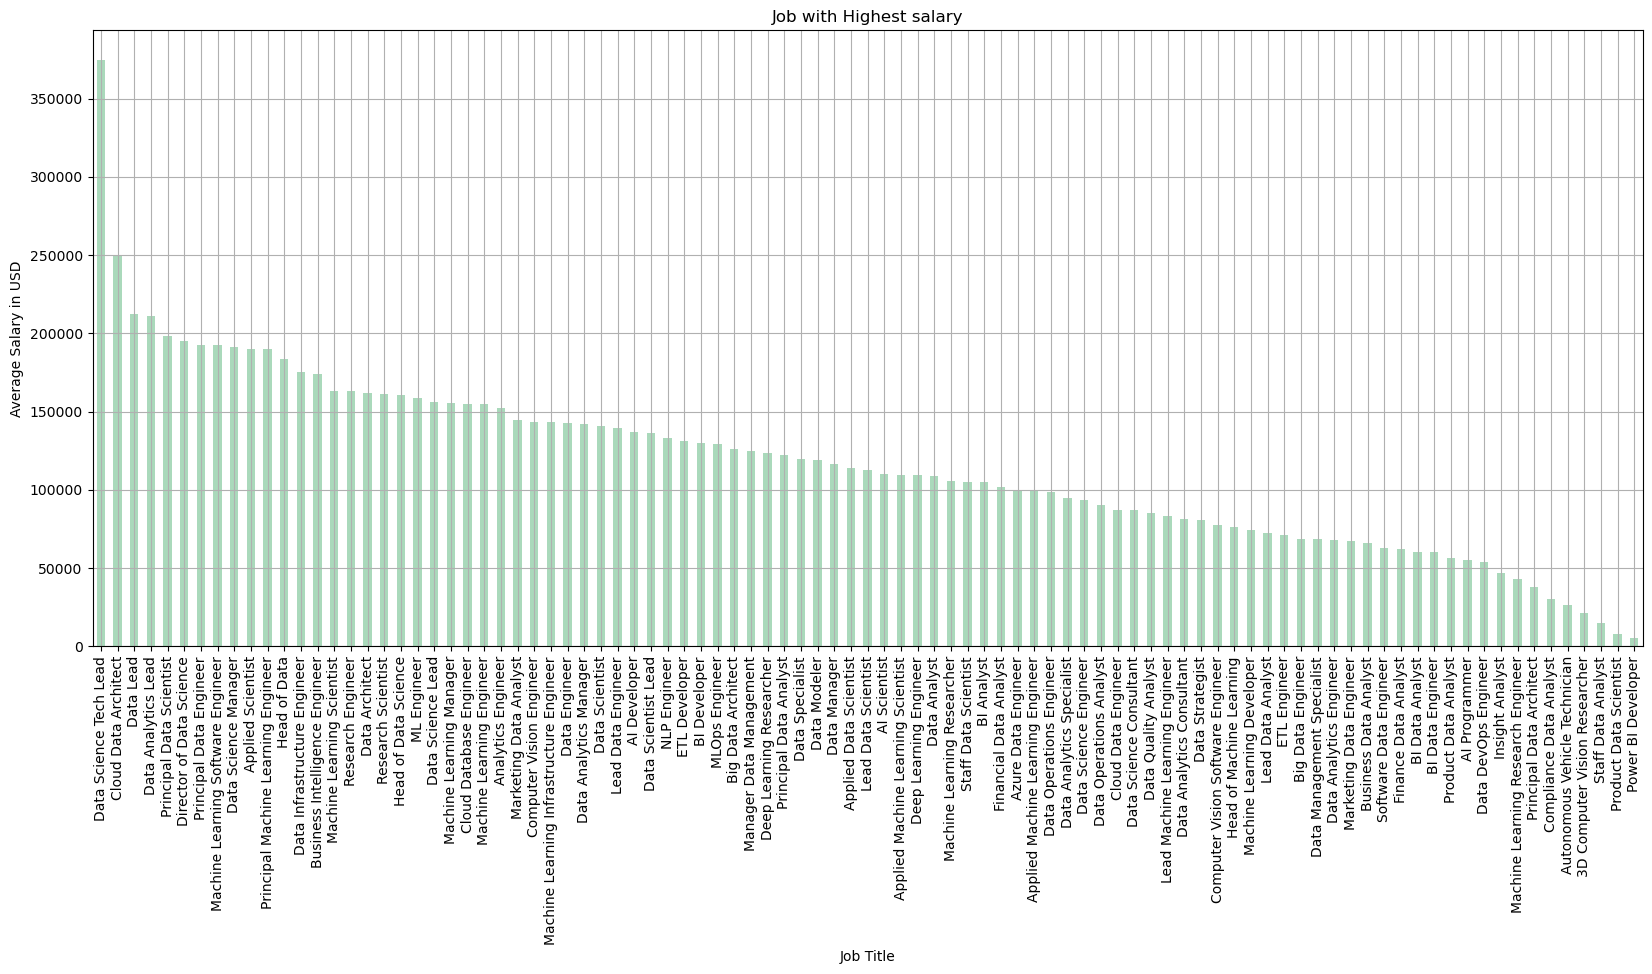

In [15]:
# Setting the figure size for the plot
plt.figure(figsize=(20, 8))
# Generating a bar plot for the job titles with highest salaries
highest_salaries.plot(kind='bar', color='#AAD9BB')
plt.title('Job with Highest salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()


 <h2> Q11. Finding out salaries based on experience level. Illustrating it through bar graph. </h2>

In [16]:
average_salary_by_level = filtered_data.groupby('experience_level')['salary_in_usd'].mean().reset_index()
average_salary_by_level

,experience_level,salary_in_usd
0,Entry Level,78546.284375
1,Executive Level,194930.929825
2,Medium Level/Intermediate,104525.939130
3,Senior Level/Expert,153051.071542


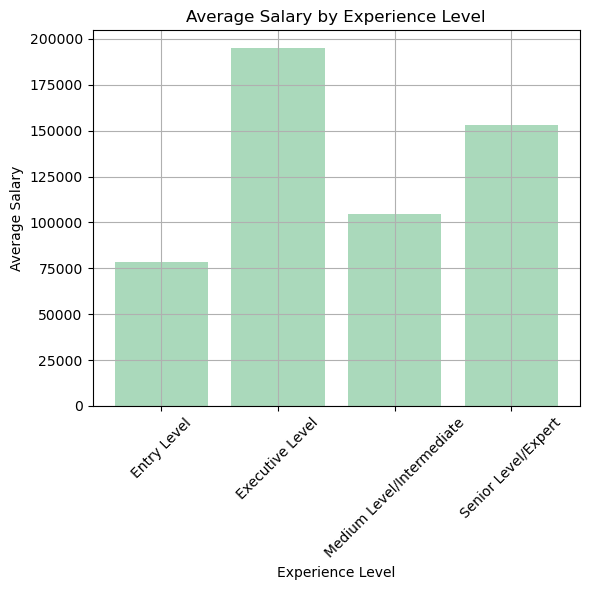

In [17]:
plt.figure(figsize=(6, 6))
plt.bar(average_salary_by_level['experience_level'], average_salary_by_level['salary_in_usd'], color='#AAD9BB')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)  # Adding grid for better visualization
plt.show()


#### <h2> Q12. Showing histogram and box plot of any chosen different variables. Use proper labels in the graph.</h2>

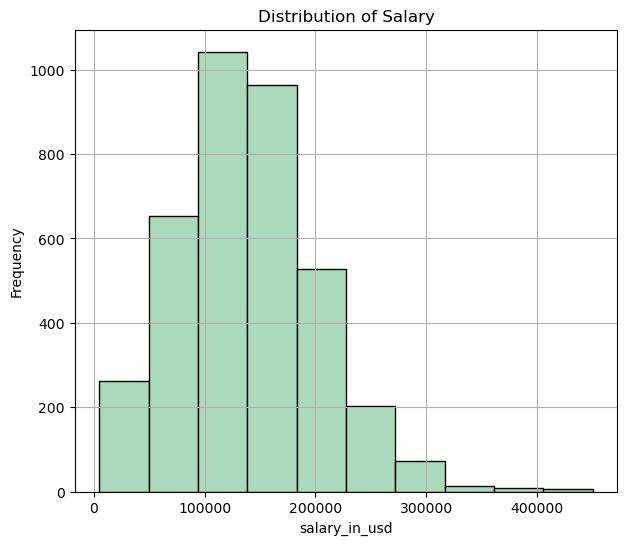

In [18]:
plt.figure(figsize=(7, 6))
plt.hist(filtered_data['salary_in_usd'], color='#AAD9BB', edgecolor='black')
plt.grid(True)
plt.title('Distribution of Salary')
plt.xlabel('salary_in_usd')
plt.ylabel('Frequency')
plt.show()


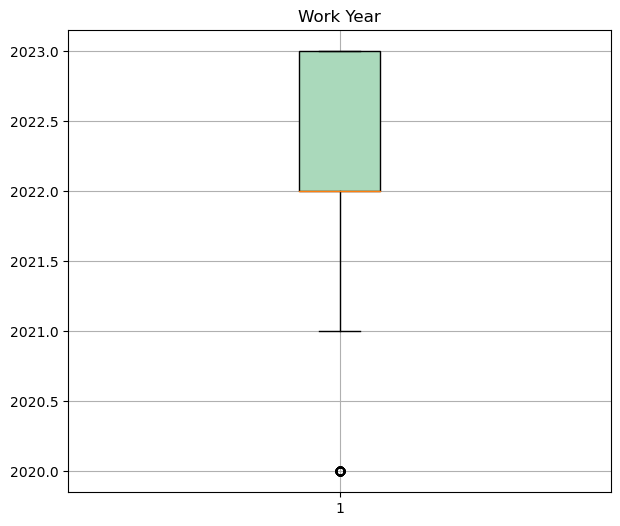

In [19]:
plt.figure(figsize=(7, 6))  # Setting the figure size
plt.boxplot(filtered_data['work_year'], patch_artist=True, boxprops=dict(facecolor='#AAD9BB'))  # Adding color to the boxplot
plt.title('Work Year')  # Setting the title of the plot
plt.grid(True)  # Adding gridlines to the plot
plt.show()  # Displaying the plot
